<a href="https://colab.research.google.com/github/Bhavana0929/DNN_from_scratch/blob/main/DNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
!wget https://raw.githubusercontent.com/Coding-Lane/Deep-Neural-Network-from-scratch/refs/heads/main/dataset/cat_train_x.csv

--2025-02-11 20:49:29--  https://raw.githubusercontent.com/Coding-Lane/Deep-Neural-Network-from-scratch/refs/heads/main/dataset/cat_train_x.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64204800 (61M) [text/plain]
Saving to: ‘cat_train_x.csv’

cat_train_x.csv     100%[===================>]  61.23M   209MB/s    in 0.3s    

2025-02-11 20:49:30 (209 MB/s) - ‘cat_train_x.csv’ saved [64204800/64204800]



In [ ]:
!wget https://raw.githubusercontent.com/Coding-Lane/Deep-Neural-Network-from-scratch/refs/heads/main/dataset/cat_train_y.csv

--2025-02-11 20:49:30--  https://raw.githubusercontent.com/Coding-Lane/Deep-Neural-Network-from-scratch/refs/heads/main/dataset/cat_train_y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5226 (5.1K) [text/plain]
Saving to: ‘cat_train_y.csv’

cat_train_y.csv     100%[===================>]   5.10K  --.-KB/s    in 0s      

2025-02-11 20:49:30 (43.0 MB/s) - ‘cat_train_y.csv’ saved [5226/5226]



In [ ]:
!wget https://raw.githubusercontent.com/Coding-Lane/Deep-Neural-Network-from-scratch/refs/heads/main/dataset/cat_test_x.csv

--2025-02-11 20:49:30--  https://raw.githubusercontent.com/Coding-Lane/Deep-Neural-Network-from-scratch/refs/heads/main/dataset/cat_test_x.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15372288 (15M) [text/plain]
Saving to: ‘cat_test_x.csv’

cat_test_x.csv      100%[===================>]  14.66M  --.-KB/s    in 0.07s   

2025-02-11 20:49:30 (214 MB/s) - ‘cat_test_x.csv’ saved [15372288/15372288]



In [ ]:
!wget https://raw.githubusercontent.com/Coding-Lane/Deep-Neural-Network-from-scratch/refs/heads/main/dataset/cat_test_y.csv

--2025-02-11 20:49:31--  https://raw.githubusercontent.com/Coding-Lane/Deep-Neural-Network-from-scratch/refs/heads/main/dataset/cat_test_y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1251 (1.2K) [text/plain]
Saving to: ‘cat_test_y.csv’

cat_test_y.csv      100%[===================>]   1.22K  --.-KB/s    in 0s      

2025-02-11 20:49:31 (36.4 MB/s) - ‘cat_test_y.csv’ saved [1251/1251]



In [ ]:
X_train = np.loadtxt('cat_train_x.csv', delimiter = ',')/255.0
Y_train = np.loadtxt('cat_train_y.csv', delimiter = ',').reshape(1, X_train.shape[1])
X_test = np.loadtxt('cat_test_x.csv', delimiter = ',')/255.0
Y_test = np.loadtxt('cat_test_y.csv', delimiter = ',').reshape(1, X_test.shape[1])


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:1000,:,:]
y_train = y_train[:1000]
x_test = x_test[:100,:,:]
y_test = y_test[:100]

x_train = x_train.reshape(x_train.shape[0], 784).T/255
x_test = x_test.reshape(x_test.shape[0], 784).T/255
y_train = to_categorical(y_train).T
y_test = to_categorical(y_test).T

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(784, 1000)
(10, 1000)
(784, 100)
(10, 100)


In [ ]:
X_train.shape[0]

12288

In [ ]:
Y_train.shape[0]

1

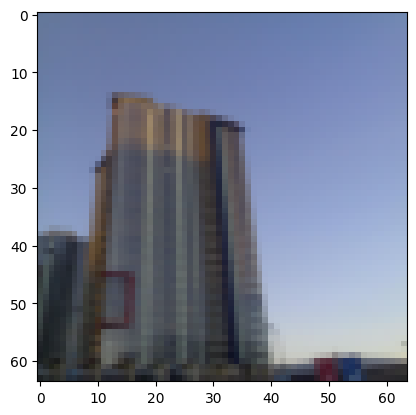

In [ ]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(64,64, 3))
plt.show()

In [ ]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

def softmax(z):
    expZ = np.exp(z)
    return expZ/(np.sum(expZ, 0))

def relu(Z):
    A = np.maximum(0,Z)
    return A

def tanh(x):
    return np.tanh(x)

def derivative_relu(Z):
    return np.array(Z > 0, dtype = 'float')

def derivative_tanh(x):
    return (1 - np.power(x, 2))

In [ ]:
def initialize_parameters(layer_dims):
  parameters = {}
  for i in range(1,len(layer_dims)):
    parameters["W"+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])/np.sqrt(layer_dims[i-1])
    parameters["b"+str(i)] = np.zeros((layer_dims[i],1))
  return parameters

In [ ]:
layer_dims = [X_train.shape[0],100,200,Y_train.shape[0]]
params = initialize_parameters(layer_dims)

for i in range(1,len(layer_dims)):
  print("Shape of W"+str(i)+":",params["W"+str(i)].shape)
  print("Shape of b"+str(i)+":",params["b"+str(i)].shape,"\n")

Shape of W1: (100, 12288)
Shape of b1: (100, 1) 

Shape of W2: (200, 100)
Shape of b2: (200, 1) 

Shape of W3: (1, 200)
Shape of b3: (1, 1) 



In [ ]:
def forward_propagation(X, parameters, activation):

    forward_cache = {}
    L = len(parameters) // 2

    forward_cache['A0'] = X

    for l in range(1, L):
        forward_cache['Z' + str(l)] = parameters['W' + str(l)].dot(forward_cache['A' + str(l-1)]) + parameters['b' + str(l)]

        if activation == 'tanh':
            forward_cache['A' + str(l)] = tanh(forward_cache['Z' + str(l)])
        else:
            forward_cache['A' + str(l)] = relu(forward_cache['Z' + str(l)])


    forward_cache['Z' + str(L)] = parameters['W' + str(L)].dot(forward_cache['A' + str(L-1)]) + parameters['b' + str(L)]

    if forward_cache['Z' + str(L)].shape[0] == 1:
        forward_cache['A' + str(L)] = sigmoid(forward_cache['Z' + str(L)])
    else :
        forward_cache['A' + str(L)] = softmax(forward_cache['Z' + str(L)])

    return forward_cache['A' + str(L)], forward_cache

In [ ]:
def compute_cost(AL,Y):
  m = Y.shape[1]
  if Y.shape == 1:
    cost = -(1./m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
  else:
    cost = -(1./m)*np.sum(Y*np.log(AL))
  cost = np.squeeze(cost)
  return cost

In [ ]:
def backward_propagation(AL,Y,parameters,forward_cache,activation):
  grads = {}
  m=Y.shape[1]
  L =len(parameters)//2

  grads["dZ"+str(L)] = AL-Y
  grads["dW"+str(L)] = (1./m)*np.dot(grads["dZ"+str(L)],forward_cache["A"+str(L-1)].T)
  grads["db"+str(L)] = (1./m)*np.sum(grads["dZ"+str(L)],axis=1,keepdims=True)

  for i in reversed(range(1, L)):
        if activation == 'tanh':
            grads["dZ" + str(i)] = np.dot(parameters['W' + str(i+1)].T,grads["dZ" + str(i+1)])*derivative_tanh(forward_cache['A' + str(i)])
        else:
            grads["dZ" + str(i)] = np.dot(parameters['W' + str(i+1)].T,grads["dZ" + str(i+1)])*derivative_relu(forward_cache['A' + str(i)])

        grads["dW" + str(i)] = (1./m) * np.dot(grads["dZ" + str(i)],forward_cache['A' + str(i-1)].T)
        grads["db" + str(i)] = (1./m) * np.sum(grads["dZ" + str(i)], axis = 1, keepdims = True)

  return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2

    for i in range(L):
        parameters["W" + str(i+1)] = parameters["W" + str(i+1)] - learning_rate * grads["dW" + str(i+1)]
        parameters["b" + str(i+1)] = parameters["b" + str(i+1)] - learning_rate * grads["db" + str(i+1)]

    return parameters

In [ ]:
def predict(X, y, parameters, activation):

    m = X.shape[1]
    y_pred, caches = forward_propagation(X, parameters, activation)

    if y.shape[0] == 1:
        y_pred = np.array(y_pred > 0.5, dtype = 'float')
    else:
        y = np.argmax(y, 0)
        y_pred = np.argmax(y_pred, 0)

    return np.round(np.sum((y_pred == y)/m), 2)

In [ ]:
def model(X, Y, layers_dims, learning_rate = 0.03, activation = 'relu', num_iterations = 3000):#lr was 0.009

    np.random.seed(1)
    costs = []

    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        AL, forward_cache = forward_propagation(X, parameters, activation)

        cost = compute_cost(AL, Y)

        grads = backward_propagation(AL, Y, parameters, forward_cache, activation)

        parameters = update_parameters(parameters, grads, learning_rate)

        if i % (num_iterations/10) == 0:
            print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2), predict(X_train, Y_train, parameters, activation), predict(X_test, Y_test, parameters, activation)))
            #print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2), predict(x_train, y_train, parameters, activation), predict(x_test, y_test, parameters, activation)))

        if i % 10 == 0:
            print("==", end = '')


    return parameters

In [ ]:
layers_dims = [x_train.shape[0], 20, 7, 5, y_train.shape[0]] #  4-layer model
lr = 0.0075
iters = 2500

parameters = model(x_train, y_train, layers_dims, learning_rate = lr, activation = 'relu', num_iterations = iters)


iter:0 	 cost: 2.31 	 train_acc:0.1 	 test_acc:0.12
iter:250 	 cost: 2.26 	 train_acc:0.18 	 test_acc:0.2
iter:500 	 cost: 2.19 	 train_acc:0.21 	 test_acc:0.23
iter:750 	 cost: 2.07 	 train_acc:0.32 	 test_acc:0.35
iter:1000 	 cost: 1.9 	 train_acc:0.35 	 test_acc:0.37
iter:1250 	 cost: 1.71 	 train_acc:0.38 	 test_acc:0.39
iter:1500 	 cost: 1.53 	 train_acc:0.44 	 test_acc:0.46
iter:1750 	 cost: 1.34 	 train_acc:0.47 	 test_acc:0.46
iter:2000 	 cost: 1.16 	 train_acc:0.55 	 test_acc:0.51
iter:2250 	 cost: 1.01 	 train_acc:0.64 	 test_acc:0.58

In [ ]:
layers_dims = [X_train.shape[0], 20, 7, 5, Y_train.shape[0]] #  4-layer model
lr = 0.0075
iters = 2500

parameters = model(X_train, Y_train, layers_dims, learning_rate = lr, activation = 'relu', num_iterations = iters)


iter:0 	 cost: 0.18 	 train_acc:0.51 	 test_acc:0.42
iter:250 	 cost: 0.26 	 train_acc:0.74 	 test_acc:0.64
iter:500 	 cost: 0.23 	 train_acc:0.78 	 test_acc:0.7
iter:750 	 cost: 0.18 	 train_acc:0.92 	 test_acc:0.78
iter:1000 	 cost: 0.11 	 train_acc:0.96 	 test_acc:0.8
iter:1250 	 cost: 0.07 	 train_acc:0.98 	 test_acc:0.76
iter:1500 	 cost: 0.04 	 train_acc:0.98 	 test_acc:0.82
iter:1750 	 cost: 0.04 	 train_acc:0.98 	 test_acc:0.8
iter:2000 	 cost: 0.03 	 train_acc:0.98 	 test_acc:0.8
iter:2250 	 cost: 0.04 	 train_acc:0.98 	 test_acc:0.8